In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
#not sure if youd like comments for my research questions
#but these graphs show my questions and provide closer analysis of what id like to prove

In [10]:
df= (
    pd.read_csv('../raw/Spotify-2000.csv')
    .drop(columns=['Index'])           
    )

In [154]:
def genre():
    df=(
        pd.read_csv('../raw/Spotify-2000.csv')
        .sort_values(['Artist','Top Genre','Year'],ascending=True)
        .drop(columns=['Index'])
    )
    return df

In [30]:
def popular():
    df = (
        pd.read_csv('../raw/Spotify-2000.csv')
        .sort_values('Popularity',ascending=False)
    )
    df2 = (
        df
        .drop(columns=['Index','Energy','Valence','Acousticness','Speechiness','Beats Per Minute (BPM)','Loudness (dB)','Length (Duration)'])
    )
    return df2

In [5]:
def year():
    df=(
        pd.read_csv('../raw/Spotify-2000.csv')
        .sort_values(['Year','Popularity'],ascending=False)
        
        .drop(columns=['Index'])
    )
    return df

In [181]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1994.0,1992.992979,16.116048,1956.0,1979.00,1993.0,2007.00,2019.0
Beats Per Minute (BPM),1994.0,120.215647,28.028096,37.0,99.00,119.0,136.00,206.0
Energy,1994.0,59.679539,22.154322,3.0,42.00,61.0,78.00,100.0
Danceability,1994.0,53.238215,15.351507,10.0,43.00,53.0,64.00,96.0
Loudness (dB),1994.0,-9.008526,3.647876,-27.0,-11.00,-8.0,-6.00,-2.0
Liveness,1994.0,19.012036,16.727378,2.0,9.00,12.0,23.00,99.0
Valence,1994.0,49.408726,24.858212,3.0,29.00,47.0,69.75,99.0
Acousticness,1994.0,28.858074,29.011986,0.0,3.00,18.0,50.00,99.0
Speechiness,1994.0,4.994985,4.401566,2.0,3.00,4.0,5.00,55.0
Popularity,1994.0,59.526580,14.351600,11.0,49.25,62.0,71.00,100.0


In [74]:
df.describe(exclude='number').T

,count,unique,top,freq
Title,1994,1958,One,3
Artist,1994,731,Queen,37
Top Genre,1994,149,album rock,413
Length (Duration),1994,350,215,23


In [224]:
#these are the most popular songs(top 20% because its so large)
def mostpop():
    df=(
        pd.read_csv('../raw/Spotify-2000.csv')
        .sort_values(['Year','Popularity'],ascending=False)
        
        .drop(columns=['Index'])
    )
    indexNames = df[df['Popularity'] < 80 ].index
    df.drop(indexNames , inplace=True)
    return df

#this method is for the least popular songs (bottom 25%)
def leastpop():
    df=(
        pd.read_csv('../raw/Spotify-2000.csv')
        .sort_values(['Popularity'],ascending=True)
        .drop(columns=['Index'])
    )
    indexNames = df[df['Popularity'] > 25 ].index
    df.drop(indexNames , inplace=True)
    return df

<AxesSubplot:xlabel='Year', ylabel='Artist'>

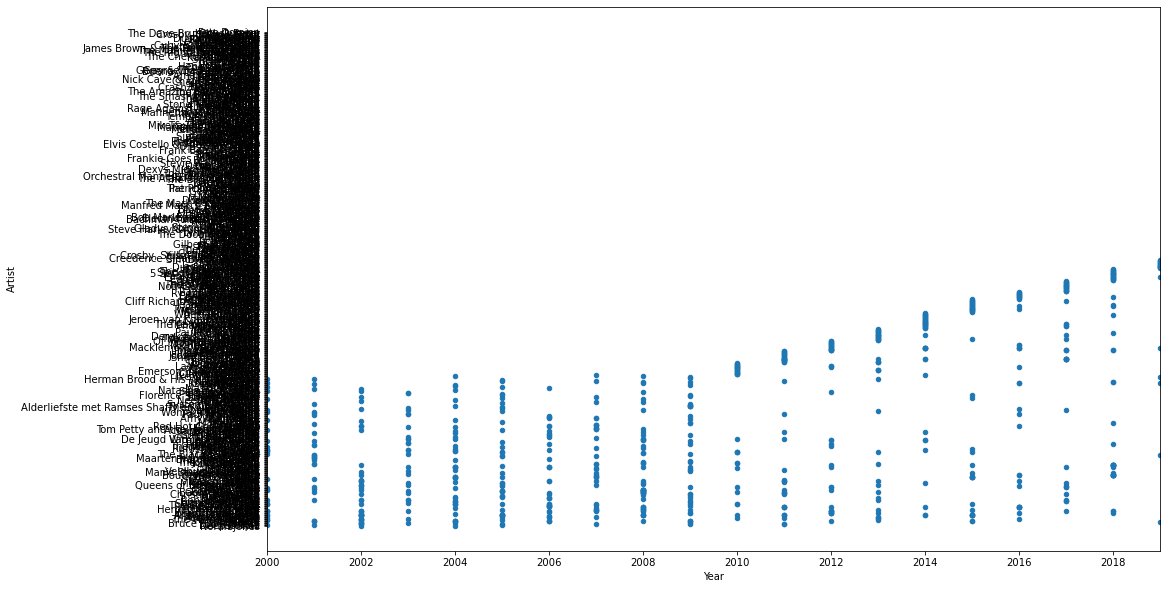

In [133]:
#too many data points for pandas plot
years=[2000,2002,2004,2006,2008,2010,2012,2014,2016,2018]
newage=df.plot.scatter(x='Year',y='Artist',figsize=(16,10),xticks=years)
newage.set_xlim(2000,2019)
newage

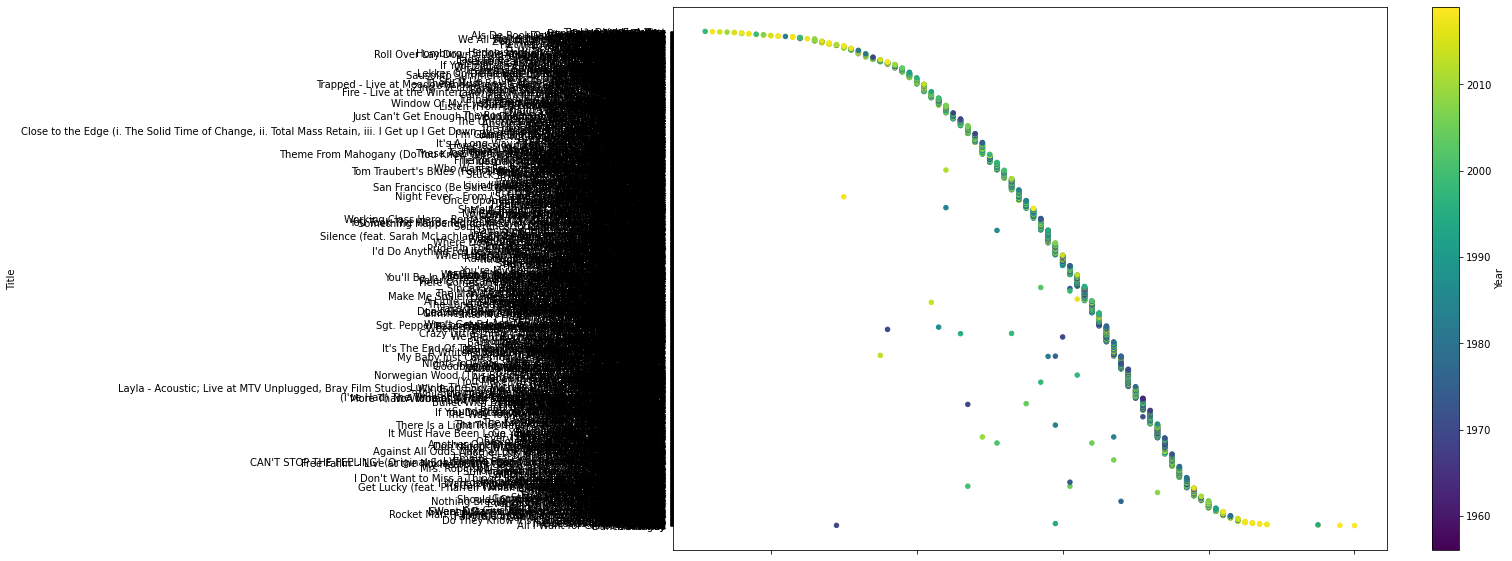

In [134]:
#still too hard to see, ill need to filter more
newpop= popular().plot.scatter(y='Title',x='Popularity',c='Year',figsize=(16,10),colormap='viridis')


In [135]:

#splot= sns.barplot(data=df,x='Artist',y='Year',hue='Title',col='Popularity')

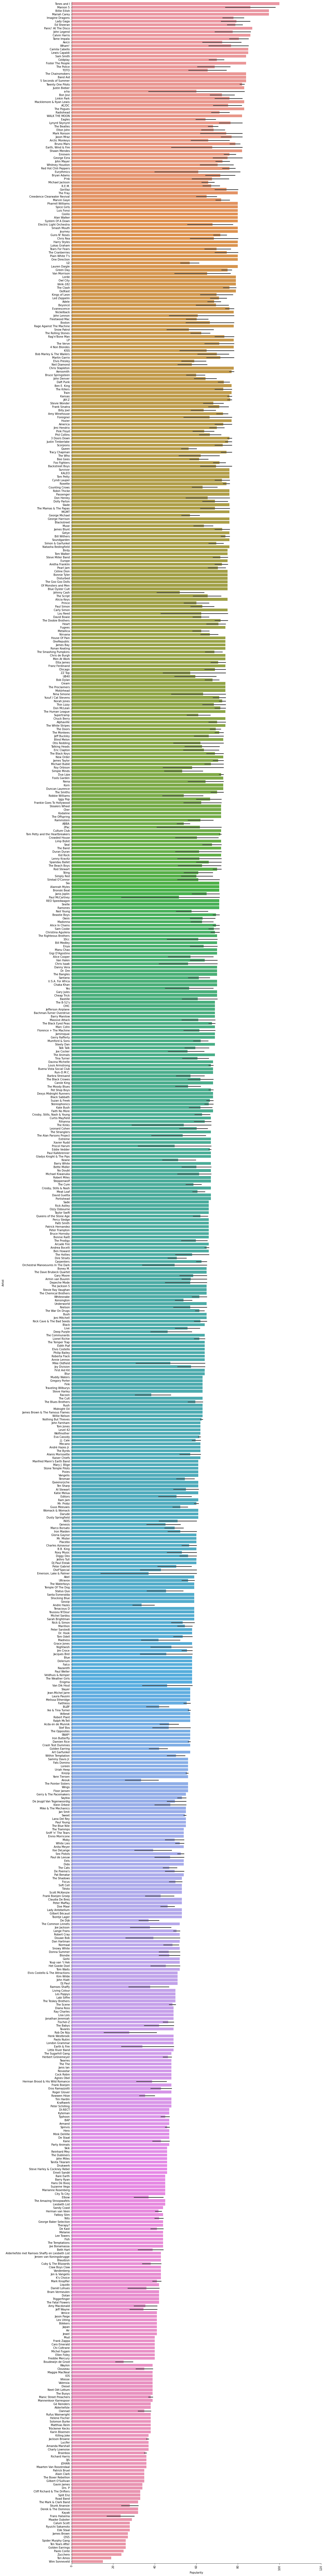

In [136]:
pop2=sns.catplot(data=popular(),y='Artist',x='Popularity',kind='bar')
pop2.fig.set_figwidth(50)
pop2.fig.set_figheight(150)
pop2.set_xticklabels(rotation=90)

In [217]:
df2=mostpop()
df2['Title_Artist']="["+df2['Artist']+"] "+df2['Title']

/Users/brendanmichaud/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


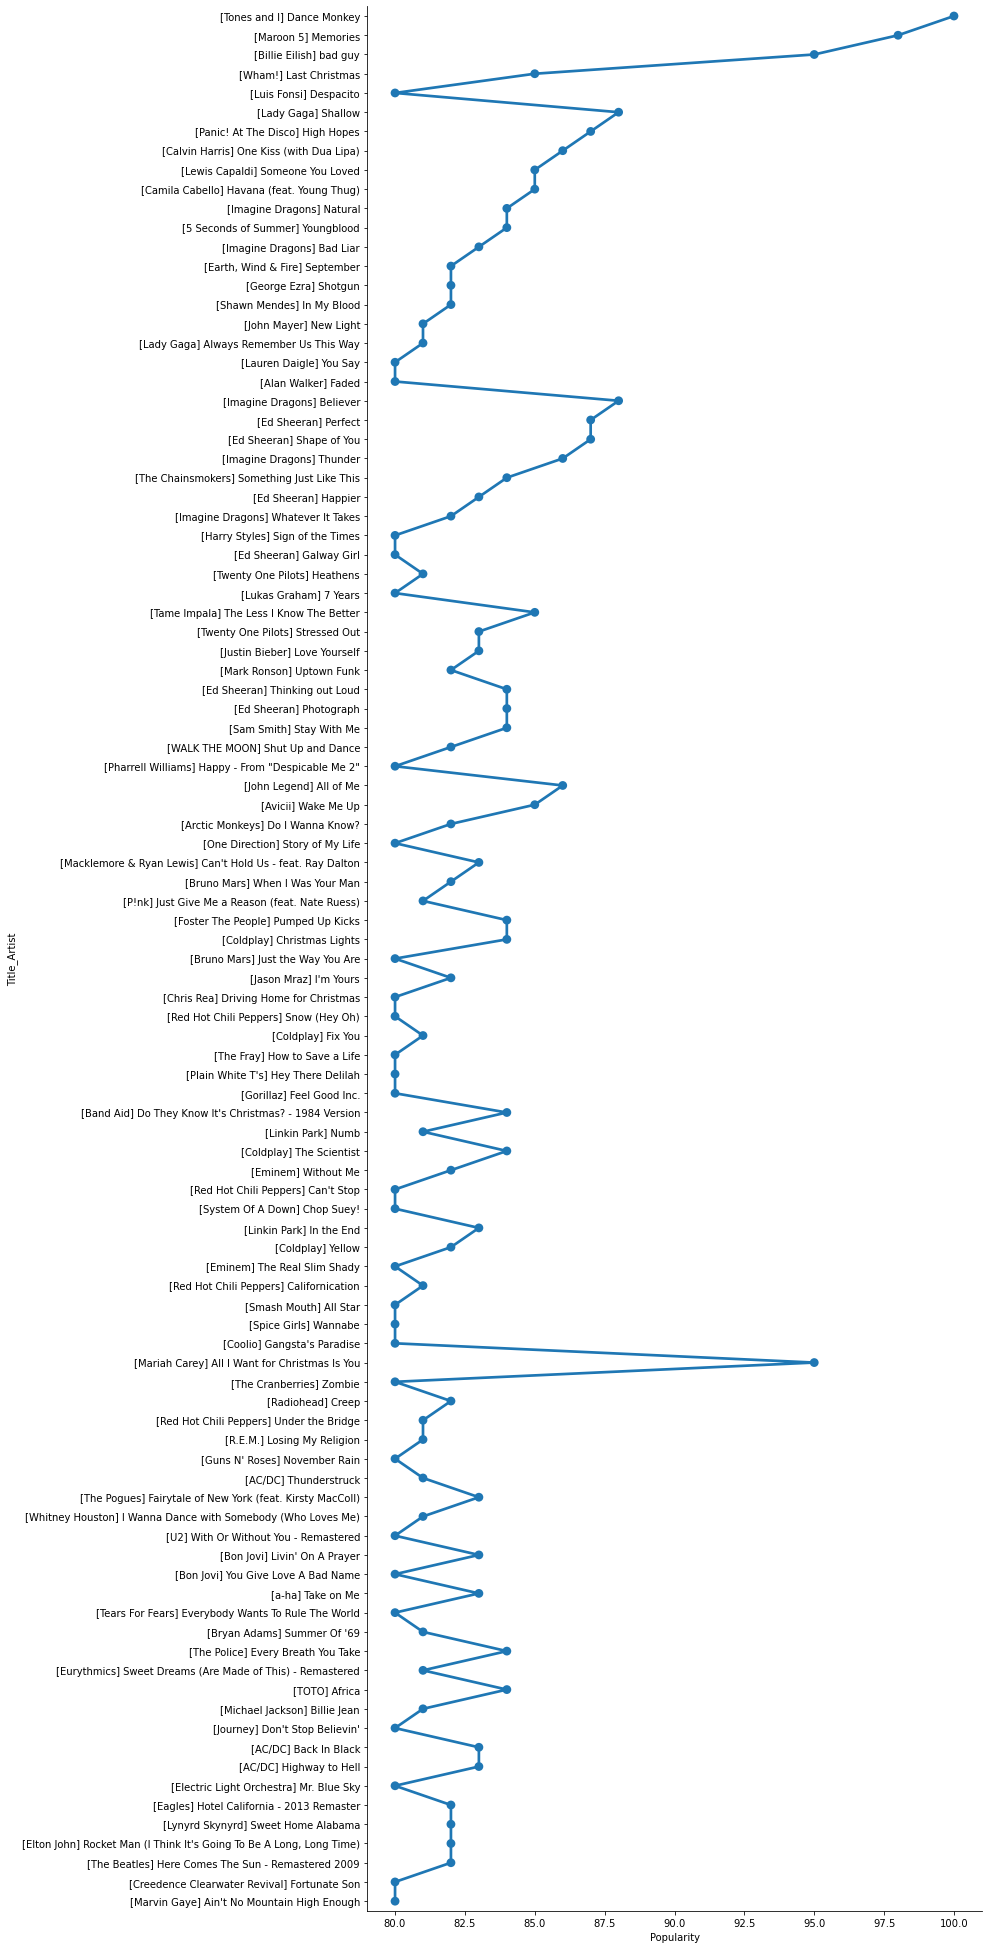

In [219]:
pop2=sns.catplot(data=df2,y='Title_Artist',x='Popularity',kind='point')
pop2.fig.set_figwidth(10)
pop2.fig.set_figheight(30)

In [226]:
df3=leastpop()
df3['Title_Artist']="["+df3['Artist']+"] "+df3['Title']

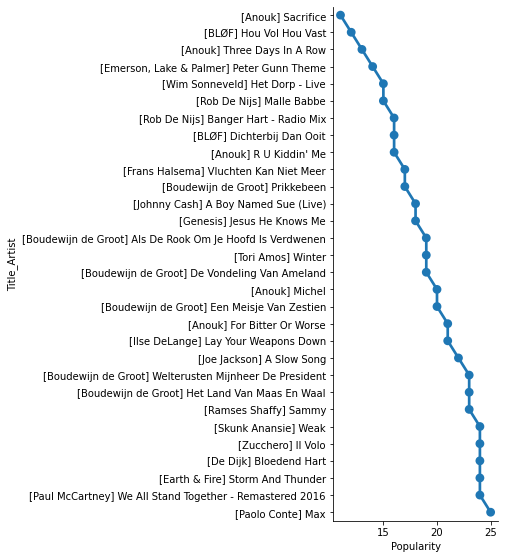

In [230]:
lpop=sns.catplot(data=df3,y='Title_Artist',x='Popularity',kind='point')
lpop.fig.set_figwidth(30)
lpop.fig.set_figheight(8)

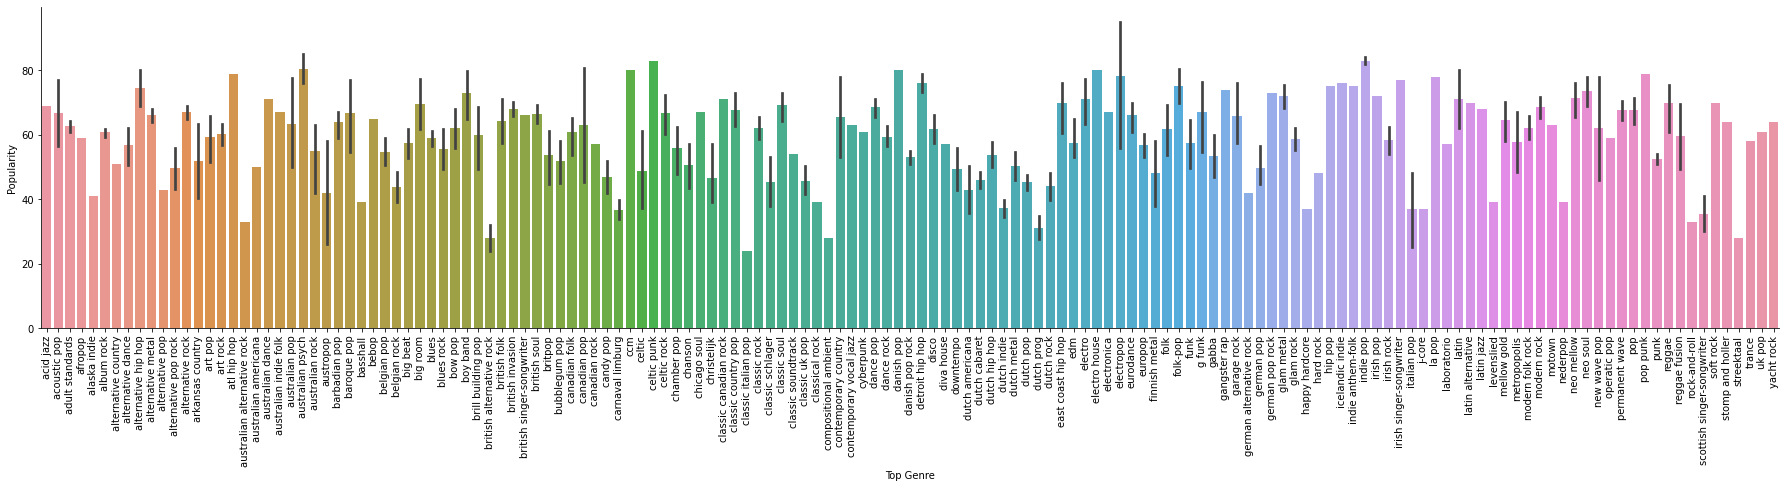

In [138]:
popGen=sns.catplot(data=popular().sort_values('Top Genre'),x='Top Genre',y='Popularity',aspect=5,kind='bar')
popGen.set_xticklabels(rotation=90)

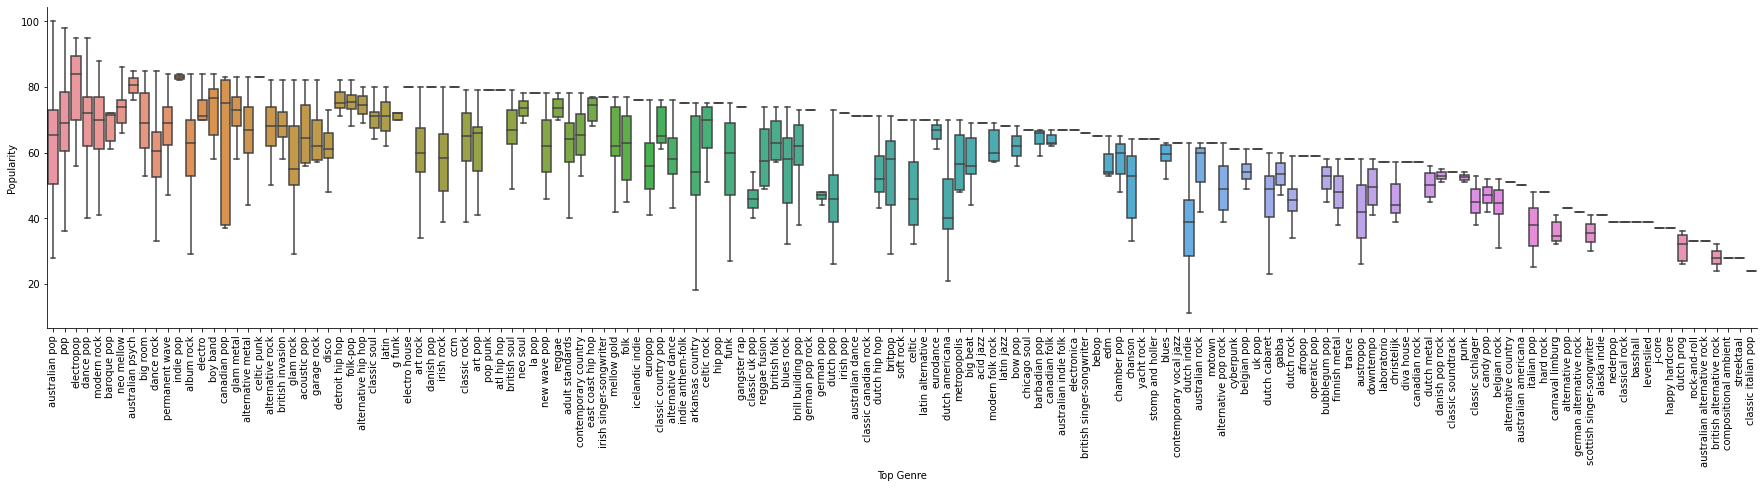

In [139]:
popGen=sns.catplot(data=popular(),x='Top Genre',y='Popularity',aspect=5,kind='box',showfliers=False)
popGen.set_xticklabels(rotation=90)